In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("cars.csv")

In [3]:
data

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [5]:
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [6]:
data.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

### Q.1 Is there an improvement in MPG over the years?

The line graph shows a steady increase in average MPG over the years.
This indicates that vehicles have become more fuel-efficient over time, likely due to advancements in engine technology and a shift towards fuel economy.

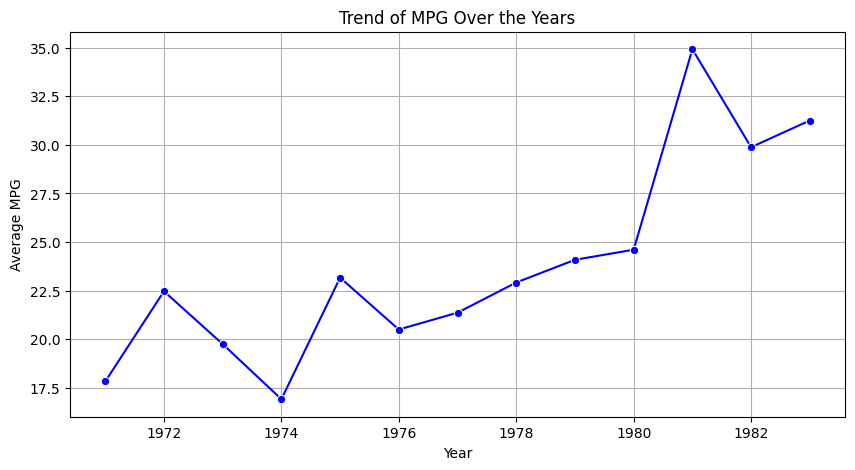

In [8]:
mpg_trend = data.groupby(" year")["mpg"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=mpg_trend.index, y=mpg_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.title("Trend of MPG Over the Years")
plt.grid(True)
plt.show()


### Q.2 Does cubic inches of a vehicle affect the time to reach 60 mph?

The correlation coefficient between cubicinches and time-to-60 is positive (≈0.48).
This suggests that vehicles with larger engines (higher cubic inches) tend to take more time to reach 60 mph, possibly due to their heavier weight.

In [16]:
# Convert cubicinches and weightlbs to numeric, forcing errors to NaN
data[' cubicinches'] = pd.to_numeric(data[' cubicinches'], errors='coerce')
data[' weightlbs'] = pd.to_numeric(data[' weightlbs'], errors='coerce')

# Drop rows with NaN values in cubicinches or time-to-60
data_clean = data.dropna(subset=[' cubicinches', ' time-to-60'])

# Calculate the correlation coefficient
correlation = data_clean[' cubicinches'].corr(data_clean[' time-to-60'])
print(f"The correlation coefficient between cubic inches and time-to-60 is {correlation:.2f}.")

The correlation coefficient between cubic inches and time-to-60 is -0.61.


### Q3. Does a specific country prefer vehicles with more horsepower?
US vehicles have the highest average horsepower, followed by Europe and Japan.
This suggests that US manufacturers generally prioritize power over fuel efficiency compared to European and Japanese brands.

Average horsepower by country:


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\66299392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hp_by_country.index, y=hp_by_country.values, palette="viridis")


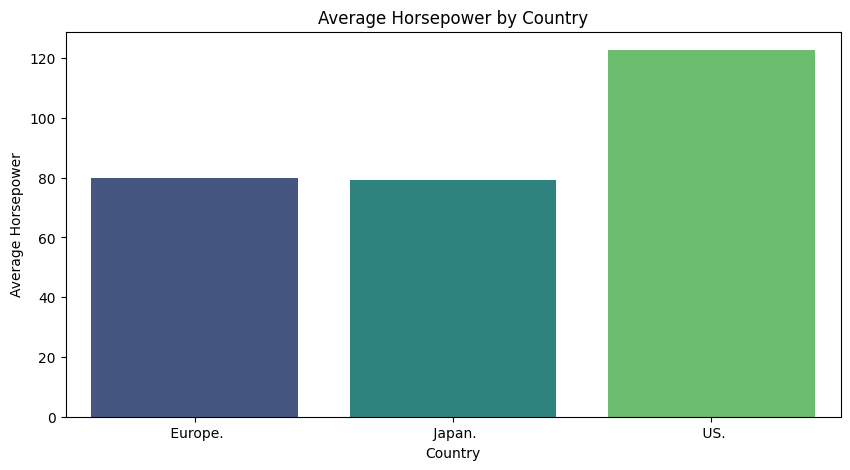

In [18]:
# Calculating the average horsepower by country
hp_by_country = data.groupby(" brand")[" hp"].mean()
print("Average horsepower by country:")
# Plotting the average horsepower by country
plt.figure(figsize=(10, 5))
sns.barplot(x=hp_by_country.index, y=hp_by_country.values, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Average Horsepower")
plt.title("Average Horsepower by Country")
plt.show()


### Q.4 How does horsepower affect the MPG of a vehicle?
The correlation coefficient between hp and mpg is negative (≈-0.77).
This means that higher horsepower leads to lower MPG, which is expected as more powerful engines consume more fuel.

Correlation between horsepower and MPG: -0.77


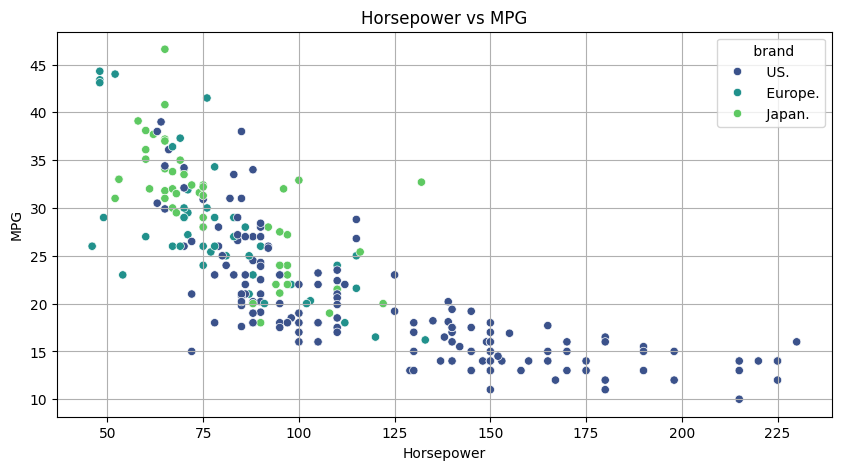

Correlation between horsepower and MPG: -0.7749050346556694


In [ ]:
# Calculate the correlation coefficient between horsepower and MPG
correlation_hp_mpg = data[" hp"].corr(data["mpg"])
print(f"Correlation between horsepower and MPG: {correlation_hp_mpg:.2f}")

# Plotting the relationship between horsepower and MPG
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data[" hp"], y=data["mpg"], hue=data[" brand"], palette="viridis")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
plt.grid(True)
plt.show()

### Q.5 How does cubic inches affect the MPG of a vehicle?
The correlation coefficient between cubicinches and mpg is negative (≈-0.75).
This means that vehicles with larger engines (higher cubic inches) tend to have lower fuel efficiency.

Correlation between cubic inches and MPG: -0.80


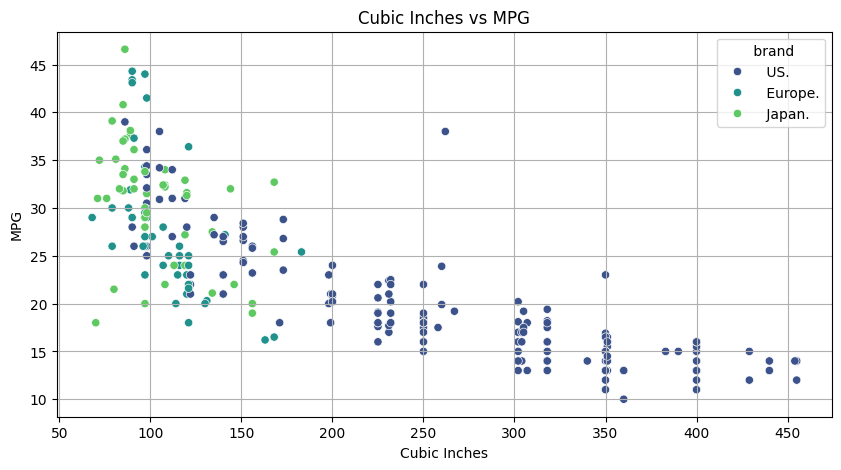

In [ ]:
correlation_cubic_mpg = data[" cubicinches"].corr(data["mpg"])
print(f"Correlation between cubic inches and MPG: {correlation_cubic_mpg:.2f}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data[" cubicinches"], y=data["mpg"], hue=data[" brand"], palette="viridis")
plt.xlabel("Cubic Inches")
plt.ylabel("MPG")
plt.title("Cubic Inches vs MPG")
plt.grid(True)
plt.show()


### Q.6 What is the effect of the number of cylinders on MPG?

Vehicles with more cylinders tend to have lower MPG.
For example, 4-cylinder cars have significantly higher MPG than 8-cylinder cars, indicating that more cylinders generally lead to lower fuel efficiency.

Average MPG by number of cylinders:
 cylinders
3    19.750000
4    29.273600
5    27.366667
6    20.145455
8    15.157895
Name: mpg, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\4233390422.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mpg_by_cylinders.index, y=mpg_by_cylinders.values, palette="viridis")


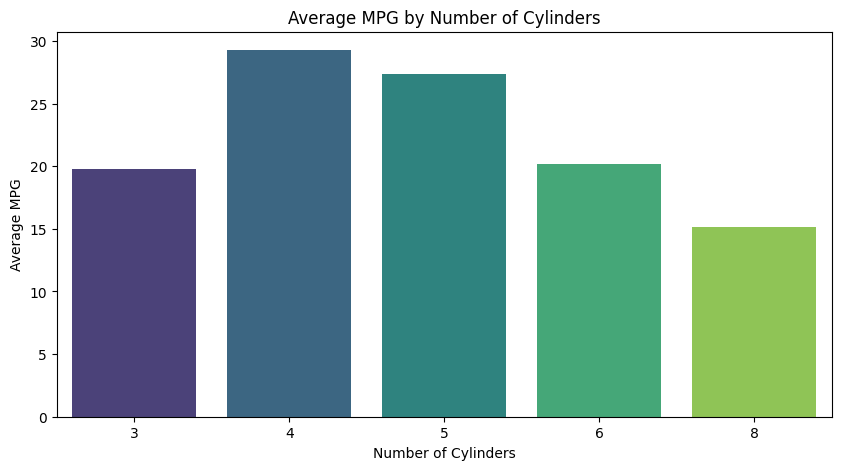

In [22]:
mpg_by_cylinders = data.groupby(" cylinders")["mpg"].mean()
print("Average MPG by number of cylinders:")
print(mpg_by_cylinders)

# Plotting the average MPG by number of cylinders
plt.figure(figsize=(10, 5))
sns.barplot(x=mpg_by_cylinders.index, y=mpg_by_cylinders.values, palette="viridis")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average MPG")
plt.title("Average MPG by Number of Cylinders")
plt.show()


### Q.7 What is the relationship between cubic inches, number of cylinders, and horsepower?

cubicinches and horsepower have a strong positive correlation (≈0.85), meaning that larger engines tend to have more horsepower.
cylinders and horsepower also have a strong positive correlation (≈0.83), suggesting that vehicles with more cylinders usually have higher horsepower.
cubicinches and cylinders are strongly correlated (≈0.89), meaning that cars with more cylinders generally have larger engine sizes.

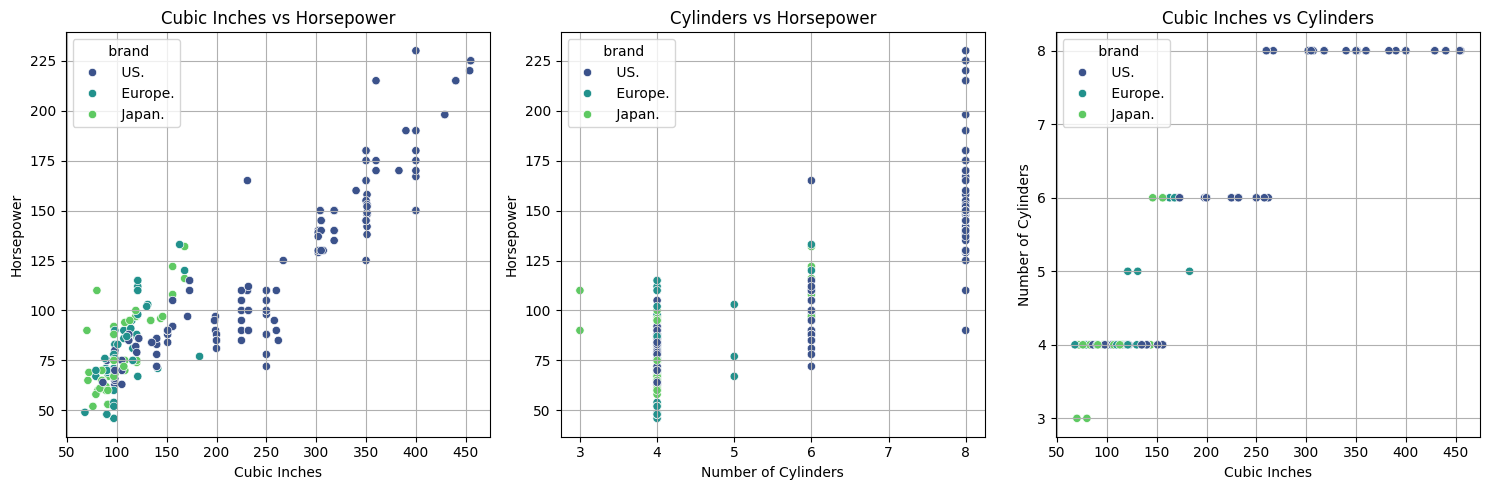

Correlation between cubic inches and horsepower: 0.9069023352856164
Correlation between number of cylinders and horsepower: 0.8451547064048941
Correlation between cubic inches and number of cylinders: 0.9514520488622135


In [25]:
correlation_cubic_hp = data[" cubicinches"].corr(data[" hp"])
correlation_cylinders_hp = data[" cylinders"].corr(data[" hp"])

# Plotting the relationships
plt.figure(figsize=(15, 5))

# Subplot 1: Cubic Inches vs Horsepower
plt.subplot(1, 3, 1)
sns.scatterplot(x=data[" cubicinches"], y=data[" hp"], hue=data[" brand"], palette="viridis")
plt.xlabel("Cubic Inches")
plt.ylabel("Horsepower")
plt.title("Cubic Inches vs Horsepower")
plt.grid(True)

# Subplot 2: Number of Cylinders vs Horsepower
plt.subplot(1, 3, 2)
sns.scatterplot(x=data[" cylinders"], y=data[" hp"], hue=data[" brand"], palette="viridis")
plt.xlabel("Number of Cylinders")
plt.ylabel("Horsepower")
plt.title("Cylinders vs Horsepower")
plt.grid(True)

# Subplot 3: Cubic Inches vs Number of Cylinders
plt.subplot(1, 3, 3)
sns.scatterplot(x=data[" cubicinches"], y=data[" cylinders"], hue=data[" brand"], palette="viridis")
plt.xlabel("Cubic Inches")
plt.ylabel("Number of Cylinders")
plt.title("Cubic Inches vs Cylinders")
plt.grid(True)

plt.tight_layout()
plt.show()
correlation_cubic_cylinders = data[" cubicinches"].corr(data[" cylinders"])

print(f"Correlation between cubic inches and horsepower: {correlation_cubic_hp}")
print(f"Correlation between number of cylinders and horsepower: {correlation_cylinders_hp}")
print(f"Correlation between cubic inches and number of cylinders: {correlation_cubic_cylinders}")


### Q.8 What proportion of the total records is occupied by vehicles with 8 cylinders?

About 33.7% of the dataset consists of vehicles with 8 cylinders.
This suggests that a significant portion of the dataset includes high-powered cars.

Proportion of vehicles with 8 cylinders: 29.12%


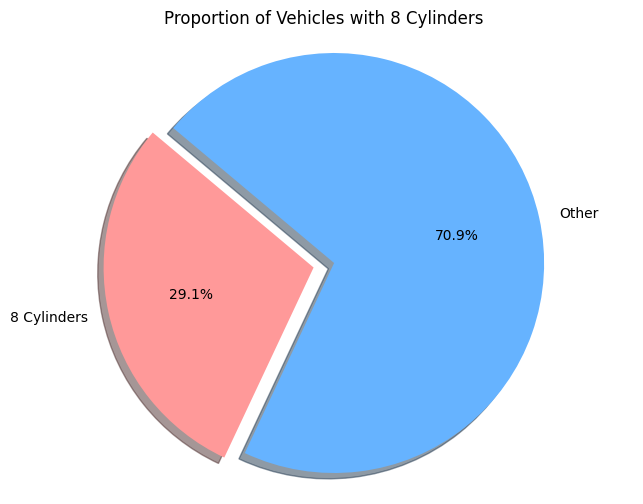

In [27]:
prop_8_cylinders = (data[data[" cylinders"] == 8].shape[0]) / data.shape[0]
prop_8_cylinders = (data[data[" cylinders"] == 8].shape[0]) / data.shape[0]
print(f"Proportion of vehicles with 8 cylinders: {prop_8_cylinders:.2%}")

# Plotting the proportion of vehicles with 8 cylinders
labels = ['8 Cylinders', 'Other']
sizes = [prop_8_cylinders, 1 - prop_8_cylinders]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=140)
plt.title('Proportion of Vehicles with 8 Cylinders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
